# Plot single-cell doubling times

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm

from macrohet import plot

# Setup
sns.set(style="white", font="Nimbus Sans")
sns.set_palette(['#1a9641', '#a6d96a', '#978897', '#d1d1ca', '#f1b6da', '#d02c91'])
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

### Load single-cell data

#### Using CSV

In [12]:
csv_path = "../data/single_cell_df.csv"
df = pd.read_csv(csv_path, index_col=0)
df

,Time (hours),Mtb Area (µm),dMtb Area (µm),Mphi Area (µm),dMphi Area (µm),Infection Status,Initial Infection Status,Final Infection Status,x,y,...,Uptake,dMtb Area between frames (µm),Mtb Area Processed (µm),Time Model (hours),Mtb Area Model (µm),mtb_origin,Doubling Amounts,Doubling Times,r2,Frame
405,0.0,46.797680,136.772588,660.776979,-68.386294,NaN,1.0,1.0,519.922607,876.779602,...,False,NaN,NaN,NaN,NaN,Growth,"[50.6, 101.2]",[28.0],0.97,0
406,1.0,48.719647,136.772588,585.105086,-68.386294,NaN,1.0,1.0,522.290833,876.766357,...,False,1.921968,NaN,NaN,NaN,Growth,"[50.6, 101.2]",[28.0],0.97,1
407,2.0,52.206007,136.772588,582.020998,-68.386294,True,1.0,1.0,524.336243,874.563110,...,False,3.486360,NaN,2.0,47.625714,Growth,"[50.6, 101.2]",[28.0],0.97,2
408,3.0,50.552221,136.772588,572.232372,-68.386294,True,1.0,1.0,516.952454,876.656799,...,False,-1.653786,NaN,3.0,49.099089,Growth,"[50.6, 101.2]",[28.0],0.97,3
409,4.0,54.463202,136.772588,590.669853,-68.386294,True,1.0,1.0,521.947449,880.909363,...,False,3.910981,50.552221,4.0,50.593160,Growth,"[50.6, 101.2]",[28.0],0.97,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089728,70.0,0.000000,0.000000,1060.881495,-36.539736,False,0.0,0.0,599.478394,769.336914,...,False,0.000000,0.000000,70.0,0.000000,Junk,NaN,NaN,-0.01,70
1089729,71.0,8.872339,0.000000,937.205106,-36.539736,False,0.0,0.0,594.419922,769.042297,...,False,8.872339,0.000000,71.0,0.000000,Junk,NaN,NaN,-0.01,71
1089730,72.0,0.000000,0.000000,1189.988561,-36.539736,False,0.0,0.0,604.841675,773.028931,...,False,-8.872339,0.000000,72.0,0.000000,Junk,NaN,NaN,-0.01,72
1089731,73.0,0.000000,0.000000,975.934991,-36.539736,NaN,0.0,0.0,600.207642,771.466614,...,False,0.000000,0.000000,NaN,NaN,Junk,NaN,NaN,-0.01,73


#### Using Zarr

In [ ]:
# Load from zarr or pickle
zarr_path = "../data/single_cell_df.zarr"
df = pd.read_zarr(zarr_path) 

#### Filter out unreliable tracks


In [13]:
df = df[df['r2'] > 0.7]

### Plot individual growth dynamics graph
To inspect the LOWESS fit

Plotting growth curves:   0%|          | 0/3 [00:00<?, ?it/s]

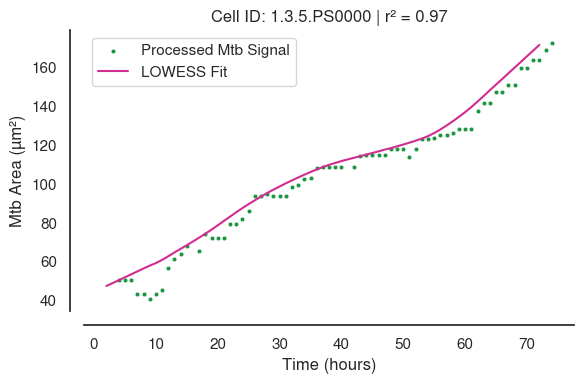

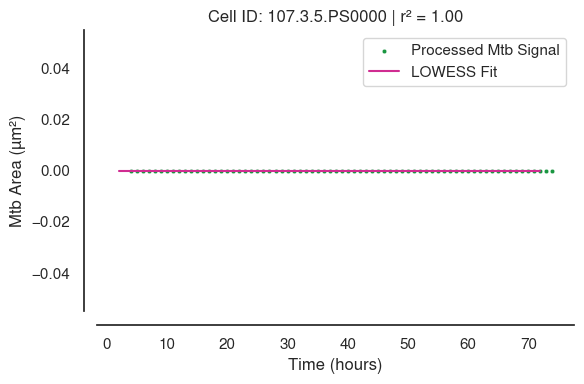

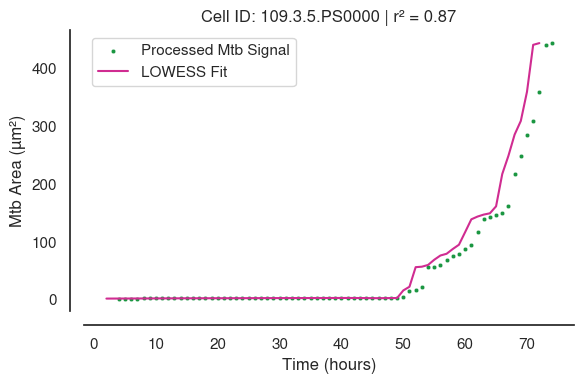

In [19]:
# Choose a subset to plot
example_ids = df['ID'].dropna().unique()[:3]

# Plot
for ID in tqdm(example_ids, desc="Plotting growth curves"):
    sc_df = df[df['ID'] == ID].sort_values(by='Time Model (hours)')

    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=sc_df, x='Time (hours)', y='Mtb Area Processed (µm)', label='Processed Mtb Signal', s=10)
    sns.lineplot(data=sc_df, x='Time Model (hours)', y='Mtb Area Model (µm)', label='LOWESS Fit', color='#d02c91')

    plt.title(f"Cell ID: {ID} | r² = {sc_df['r2'].iloc[0]:.2f}")
    plt.xlabel("Time (hours)")
    plt.ylabel("Mtb Area (µm²)")
    plt.grid(False)
    sns.despine(offset=10)
    plt.tight_layout()
    plt.show()


### Plot with doubling time quantifications 

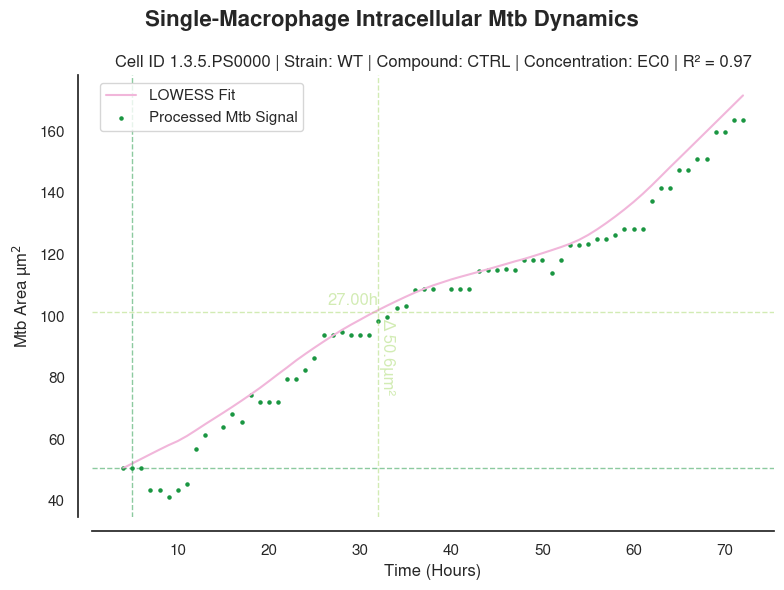

In [28]:
plot.single_cell_growth(df, ID)

# Plot all intracellular single-cell growth dynamics
As a series of colour coded line graphs.

**Note** that the graphs generated with the example data will not look the same as in the publication as the example data only contains one wild-type Mtb untreated condition.

  0%|          | 0/1795 [00:00<?, ?it/s]

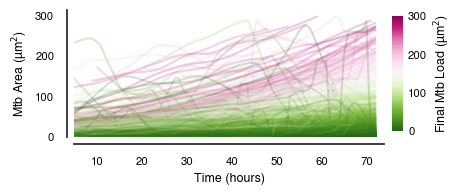

In [147]:
plot.population_dynamics_coloured(df)

# Plot distribution of doubling times
Under different antibiotic conditions and Mtb strains.

**Note** that the graphs generated with the example data will not look the same as in the publication as the example data only contains one wild-type Mtb untreated condition.

/tmp/ipykernel_894048/21637500.py:38: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


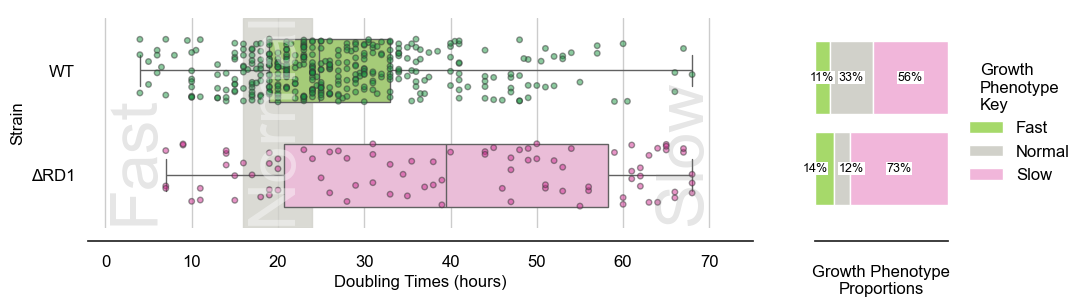

In [100]:
plot.doubling_times_boxplot(df)

### Plot doubling times distributions
According to manual classification of Mtb growth phenotype

**Note** that the graphs generated with the example data will not look the same as in the publication as the example data only contains one wild-type Mtb untreated condition.

/tmp/ipykernel_70986/2761496271.py:30: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


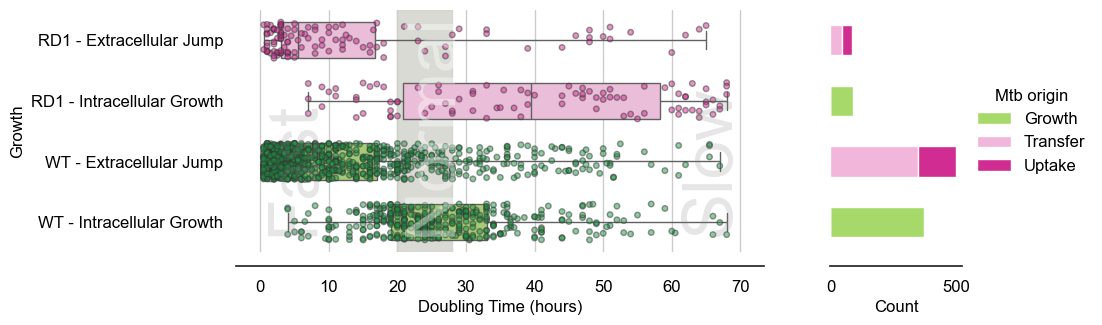

In [48]:
plot.growth_dynamics_by_origin(df)

### Plot doubling times distributions
Across all antibiotic conditions and concentrations 

**Note** that the graphs generated with the example data will not look the same as in the publication as the example data only contains one wild-type Mtb untreated condition.

##### To-do: change to stacked bar charts as in the publication and replot with publication data

/tmp/ipykernel_70986/2962595637.py:38: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(
/tmp/ipykernel_70986/2962595637.py:54: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(
/tmp/ipykernel_70986/2962595637.py:54: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(
/tmp/ipykernel_70986/2962595637.py:54: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(
/tmp/ipykernel_70986/2962595637.py:89: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped

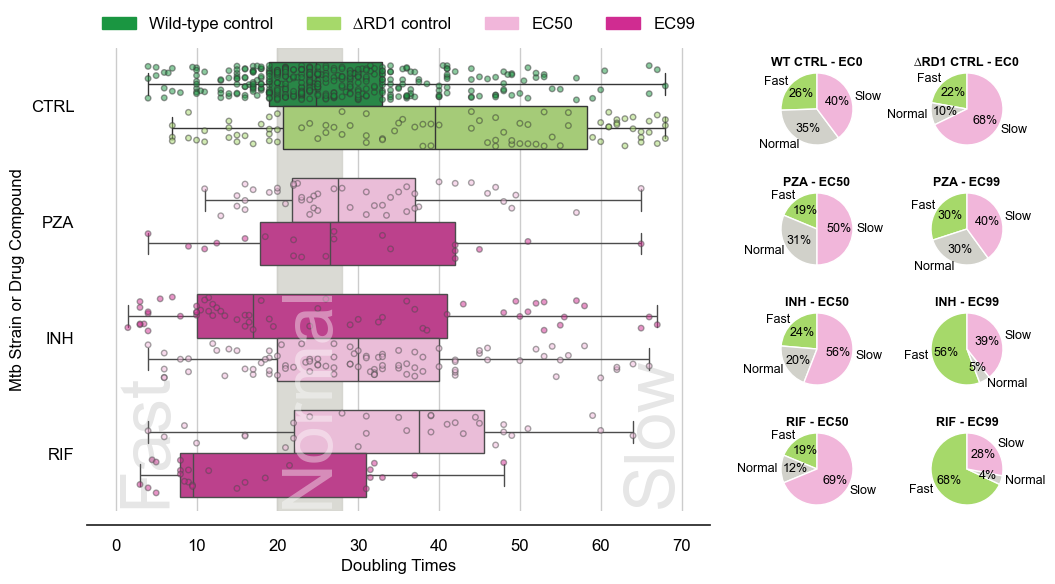

<Figure size 640x480 with 0 Axes>

In [61]:
plot.doubling_times_with_piecharts(df)